# Exemples de cartes de corrélation

In [1]:
from heliumtools.correlations import Correlation, Variable
from pathlib import Path
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os
from matplotlib.colors import LogNorm, Normalize
import matplotlib.cm as cm
from heliumtools.misc.gather_data import export_data_set_to_pickle

In [2]:
# La fonction suivante crée le fichier avec tous les atomes
ROI0 =  {"T": {"min": 310, "max": 350}}
folder = "/mnt/manip_E/2022/05/13/022"
#


'/mnt/manip_E/2022/05/13/022/dataset.pkl'

In [3]:
data = pd.read_pickle(os.path.join("/mnt/manip_E/2022/05/13/022", "dataset.pkl"))


In [4]:
n_cycles = int(np.max(data["Cycle"]))


In [10]:
len(data[data["Cycle"]==25])


711

In [6]:
boxZsize = 1
boxXsize = 10
boxYsize = 10
Xposition = 0
Yposition = -1
boxes = {
    "1": {
        "Vx": {"size": boxXsize, "position": Xposition},
        "Vy": {"size": boxYsize, "position": Yposition},
        "Vz": {"size": boxZsize, "position": 60.6},
    },
    "2": {
        "Vx": {"size": boxXsize, "position": Xposition},
        "Vy": {"size": boxYsize, "position": Yposition},
        "Vz": {"size": boxZsize, "position": 60.6},
    },
}
ROI = {
    "Vz": {"max": 300, "min": 0},
    "Vy": {"min": -50, "max": 50},
    "Vx": {"max": 200, "min": -75},
}
boite = copy.deepcopy(boxes)
raman_kick = 42.5
# Variables pour rotation à 45° : la variable Int_var est celle le long de 
#laquelle nous allons intégrer et celle Plot_var sera celle en fonction de laquelle nous allons tracer.

Plot_var = "Vz1-Vz2" 
Int_var = "Vz1+Vz2" 

# variables d'affichage 
gmin_value =0
gmax_value=2

### First Plots 
corr = Correlation(data,  ROI=ROI, boxes=boite, raman_kick=raman_kick)

<class 'float'>
Data are loaded


In [17]:
len(corr.atoms[corr.atoms["Cycle"]==25])

632

<Figure size 432x288 with 0 Axes>

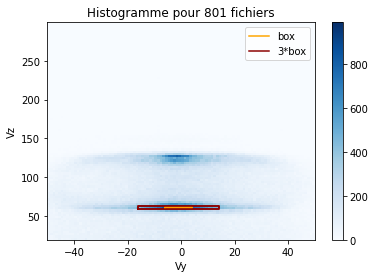

<Figure size 432x288 with 0 Axes>

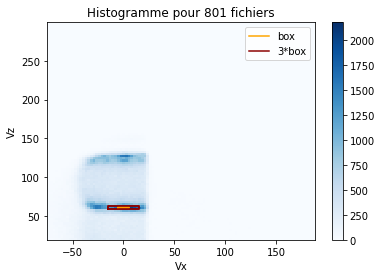

<Figure size 432x288 with 0 Axes>

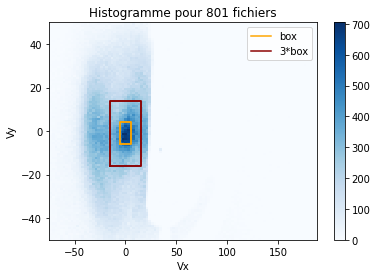

In [7]:
hist = corr.show_density(nameX="Vy", nameY="Vz", show_plot=True)
hist = corr.show_density(nameX="Vx", nameY="Vz", show_plot=True)
hist = corr.show_density(nameX="Vx", nameY="Vy", show_plot=True)

In [7]:
### CALCUL DES CORRÉLATIONS
### Définition des variations des variables (ici Vz1 et Vz2 autour du premier pic)
corr.define_variable1(
    box="1", axe="Vz", type="position", name="Vz1", min=45, max=140, step=boxZsize
)
corr.define_variable2(
    box="2", axe="Vz", type="position", name="Vz2", min=45, max=140, step=boxZsize
)

#### Calcul
corr.compute_correlations()

Gathering Vz2: 100%|███████████████████████████| 95/95 [00:00<00:00, 240.93it/s]


Total dataframe is summed already
Computation is done.


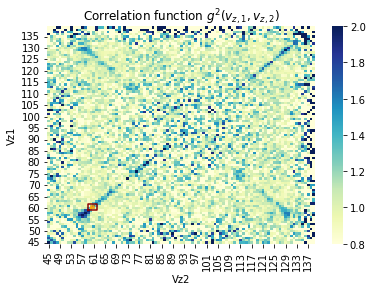

In [14]:
x = corr.var1.name
y = corr.var2.name
z = "g^2"
df_pivoted_correlations = corr.result.pivot(index=x, columns=y, values=z)
fig, ax = plt.subplots()
sns.heatmap(
    df_pivoted_correlations,
    cmap="YlGnBu",
    ax=ax,
    # norm=LogNorm()
    vmin=0.8,
    vmax=2,
)
ax.invert_yaxis()
# On dessine des boites pour représenter les boites de corrélation
def draw_box(cX, σX, cY, σY, color="orange", label="boite"):
    plt.plot(
        [cX - σX, cX + σX, cX + σX, cX - σX, cX - σX],
        [cY - σY, cY - σY, cY + σY, cY + σY, cY - σY],
        color,
    )

zz1 = np.argmin(np.abs(corr.var1.values - boxes[corr.var1.box][corr.var1.axe]["position"]))
zz2 = np.argmin(np.abs(corr.var2.values - boxes[corr.var2.box][corr.var2.axe]["position"]))
box_size1 = corr.boxes[corr.var1.box][corr.var1.axe]["size"] / corr.var1.step / 2
box_size2 = corr.boxes[corr.var2.box][corr.var2.axe]["size"] / corr.var2.step / 2
draw_box(zz2, box_size2, zz1, box_size1)
box_size1 = 3 * box_size1
box_size2 = 3 * box_size2
draw_box(zz2, box_size2, zz1, box_size1, color="darkred")
plt.title("Correlation function $g^2(v_{z,1}, v_{z,2})$")
plt.show()